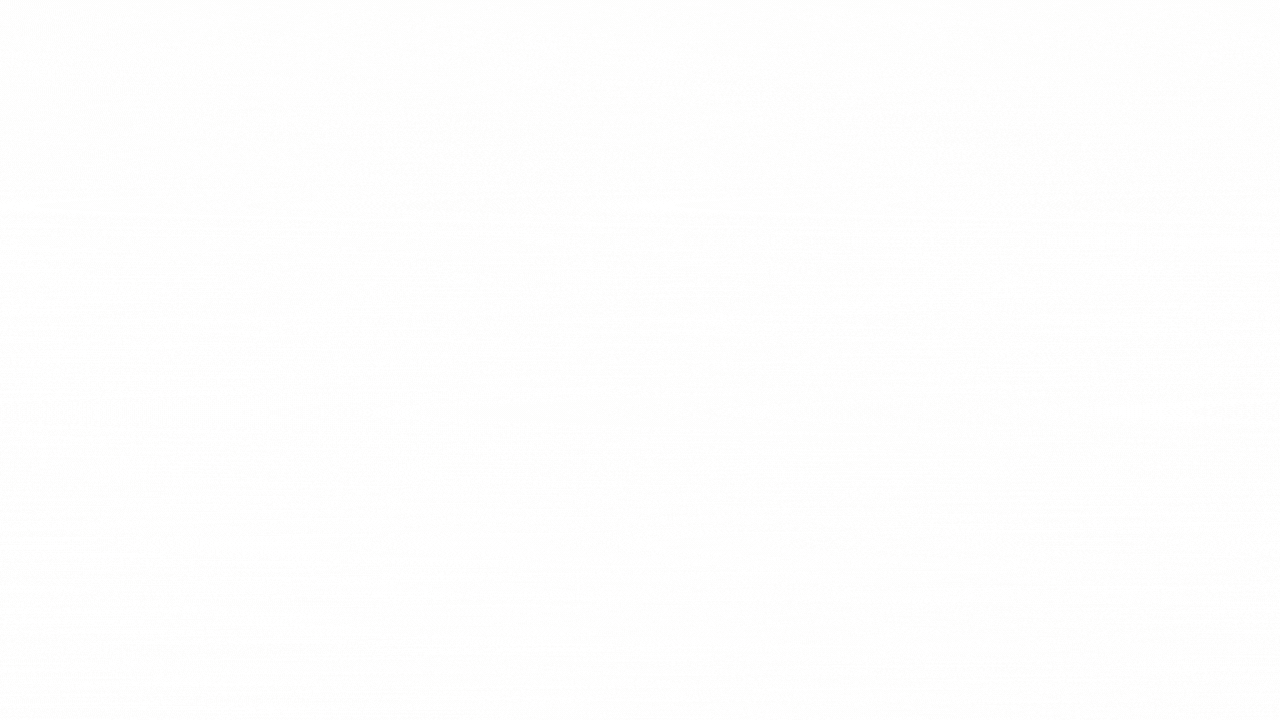

In [1]:
#importing libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
#importing the dataset
data = pd.read_csv('Fertilizer Prediction.csv')
data.head()

,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name
0,26,52,38,Sandy,Maize,37,0,0,Urea
1,29,52,45,Loamy,Sugarcane,12,0,36,DAP
2,34,65,62,Black,Cotton,7,9,30,14-35-14
3,32,62,34,Red,Tobacco,22,0,20,28-28
4,28,54,46,Clayey,Paddy,35,0,0,Urea


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Temparature      99 non-null     int64 
 1   Humidity         99 non-null     int64 
 2   Moisture         99 non-null     int64 
 3   Soil Type        99 non-null     object
 4   Crop Type        99 non-null     object
 5   Nitrogen         99 non-null     int64 
 6   Potassium        99 non-null     int64 
 7   Phosphorous      99 non-null     int64 
 8   Fertilizer Name  99 non-null     object
dtypes: int64(6), object(3)
memory usage: 7.1+ KB


In [4]:
#changing the column names
data.rename(columns={'Humidity ':'Humidity','Soil Type':'Soil_Type','Crop Type':'Crop_Type','Fertilizer Name':'Fertilizer'},inplace=True)

In [5]:
#checking unique values
data.nunique()

Temparature    14
Humidity       13
Moisture       41
Soil_Type       5
Crop_Type      11
Nitrogen       24
Potassium      13
Phosphorous    32
Fertilizer      7
dtype: int64

In [6]:
#checking for null values
data.isna().sum()

Temparature    0
Humidity       0
Moisture       0
Soil_Type      0
Crop_Type      0
Nitrogen       0
Potassium      0
Phosphorous    0
Fertilizer     0
dtype: int64

In [7]:
#statistical parameters
data.describe(include='all')

,Temparature,Humidity,Moisture,Soil_Type,Crop_Type,Nitrogen,Potassium,Phosphorous,Fertilizer
count,99.000000,99.000000,99.000000,99,99,99.000000,99.000000,99.000000,99
unique,NaN,NaN,NaN,5,11,NaN,NaN,NaN,7
top,NaN,NaN,NaN,Loamy,Sugarcane,NaN,NaN,NaN,Urea
freq,NaN,NaN,NaN,21,13,NaN,NaN,NaN,22
mean,30.282828,59.151515,43.181818,NaN,NaN,18.909091,3.383838,18.606061,NaN
std,3.502304,5.840331,11.271568,NaN,NaN,11.599693,5.814667,13.476978,NaN
min,25.000000,50.000000,25.000000,NaN,NaN,4.000000,0.000000,0.000000,NaN
25%,28.000000,54.000000,34.000000,NaN,NaN,10.000000,0.000000,9.000000,NaN
50%,30.000000,60.000000,41.000000,NaN,NaN,13.000000,0.000000,19.000000,NaN
75%,33.000000,64.000000,50.500000,NaN,NaN,24.000000,7.500000,30.000000,NaN


In [8]:
data['Soil_Type'].unique()
labels = ['Sandy', 'Loamy', 'Black', 'Red', 'Clayey']
labels_map = {labels[i]:i+1 for i in range(len(labels))}

In [9]:
labels_map


{'Sandy': 1, 'Loamy': 2, 'Black': 3, 'Red': 4, 'Clayey': 5}

In [10]:
data['Soil_Type'] = data['Soil_Type'].map(labels_map)


In [11]:
data.head()

,Temparature,Humidity,Moisture,Soil_Type,Crop_Type,Nitrogen,Potassium,Phosphorous,Fertilizer
0,26,52,38,1,Maize,37,0,0,Urea
1,29,52,45,2,Sugarcane,12,0,36,DAP
2,34,65,62,3,Cotton,7,9,30,14-35-14
3,32,62,34,4,Tobacco,22,0,20,28-28
4,28,54,46,5,Paddy,35,0,0,Urea


In [12]:
data['Crop_Type'].unique()

array(['Maize', 'Sugarcane', 'Cotton', 'Tobacco', 'Paddy', 'Barley',
       'Wheat', 'Millets', 'Oil seeds', 'Pulses', 'Ground Nuts'],
      dtype=object)

In [13]:

labels = ['Maize', 'Sugarcane', 'Cotton', 'Tobacco', 'Paddy', 'Barley',
       'Wheat', 'Millets', 'Oil seeds', 'Pulses', 'Ground Nuts']
labels_map = {labels[i]:i+1 for i in range(len(labels))}
data['Crop_Type'] = data['Crop_Type'].map(labels_map)


In [14]:
data.head()

,Temparature,Humidity,Moisture,Soil_Type,Crop_Type,Nitrogen,Potassium,Phosphorous,Fertilizer
0,26,52,38,1,1,37,0,0,Urea
1,29,52,45,2,2,12,0,36,DAP
2,34,65,62,3,3,7,9,30,14-35-14
3,32,62,34,4,4,22,0,20,28-28
4,28,54,46,5,5,35,0,0,Urea


In [15]:
data['Fertilizer'].unique()

array(['Urea', 'DAP', '14-35-14', '28-28', '17-17-17', '20-20',
       '10-26-26'], dtype=object)

In [16]:

labels = ['Urea', 'DAP', '14-35-14', '28-28', '17-17-17', '20-20',
       '10-26-26']
labels_map = {labels[i]:i+1 for i in range(len(labels))}
data['Fertilizer'] = data['Fertilizer'].map(labels_map)


In [17]:
data.head()

,Temparature,Humidity,Moisture,Soil_Type,Crop_Type,Nitrogen,Potassium,Phosphorous,Fertilizer
0,26,52,38,1,1,37,0,0,1
1,29,52,45,2,2,12,0,36,2
2,34,65,62,3,3,7,9,30,3
3,32,62,34,4,4,22,0,20,4
4,28,54,46,5,5,35,0,0,1


<AxesSubplot:xlabel='Soil_Type', ylabel='count'>

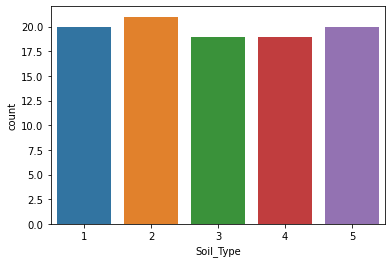

In [18]:
import seaborn as sns
sns.countplot(x='Soil_Type', data = data)

<AxesSubplot:xlabel='Crop_Type', ylabel='count'>

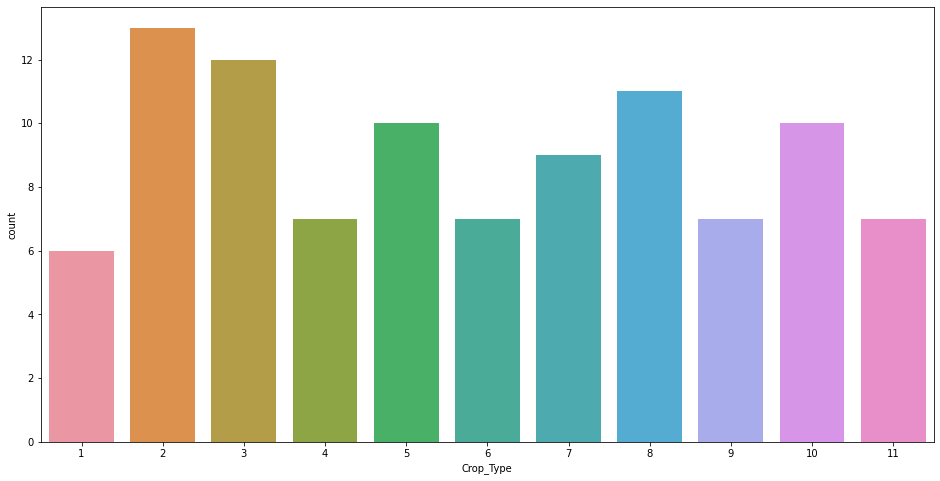

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(16,8))
sns.countplot(x='Crop_Type', data = data)

<AxesSubplot:xlabel='Fertilizer', ylabel='count'>

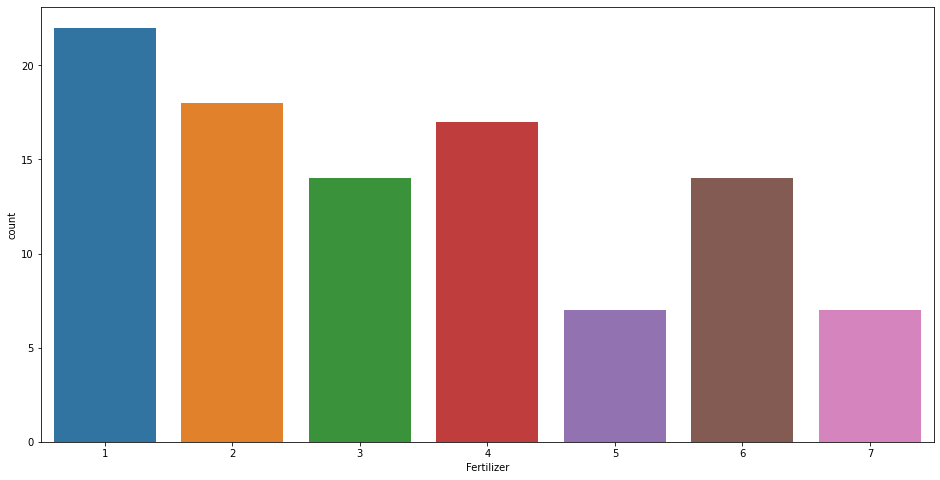

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(16,8))
sns.countplot(x='Fertilizer', data = data)

In [21]:
#Defining function for Continuous and catogorical variable
def plot_conti(x):
    fig, axes = plt.subplots(nrows=1,ncols=3,figsize=(15,5),tight_layout=True)
    axes[0].set_title('Histogram')
    sns.histplot(x,ax=axes[0])
    axes[1].set_title('Checking Outliers')
    sns.boxplot(x,ax=axes[1])
    axes[2].set_title('Relation with output variable')
    sns.boxplot(y = x,x = data.Fertilizer)
    
def plot_cato(x):
    fig, axes = plt.subplots(nrows=1,ncols=2,figsize=(15,5),tight_layout=True)
    axes[0].set_title('Count Plot')
    sns.countplot(x,ax=axes[0])
    axes[1].set_title('Relation with output variable')
    sns.countplot(x = x,hue = data.Fertilizer, ax=axes[1])

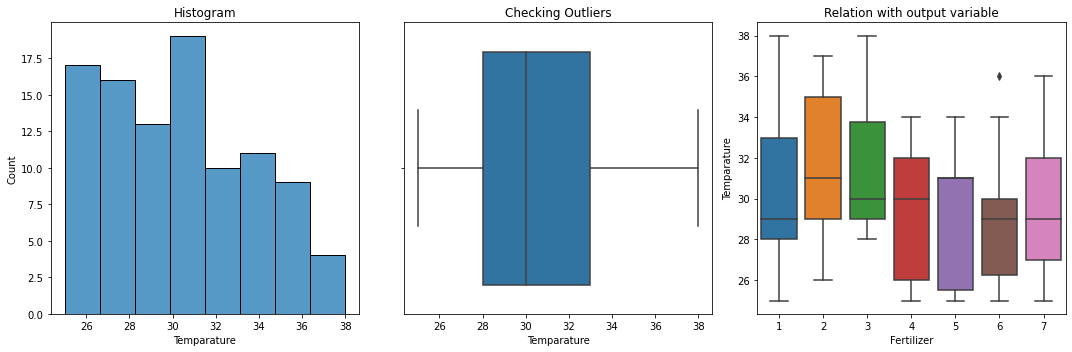

In [22]:
#EDA - Temparature variable
plot_conti(data.Temparature)

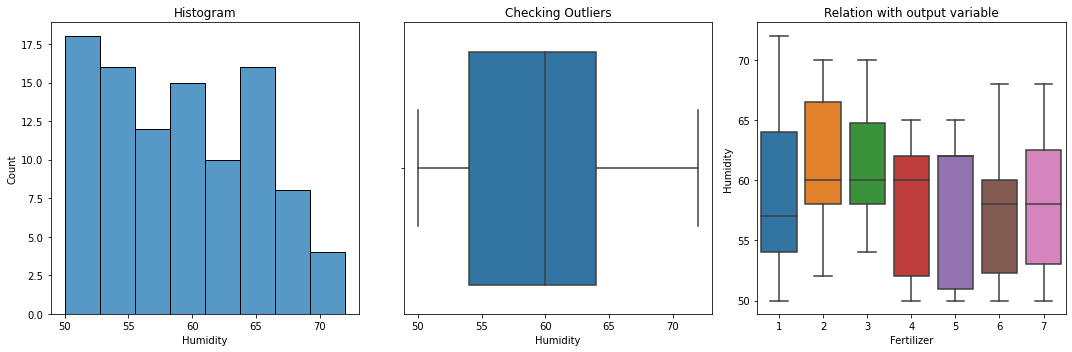

In [23]:
#EDA - Humidity variable
plot_conti(data.Humidity)

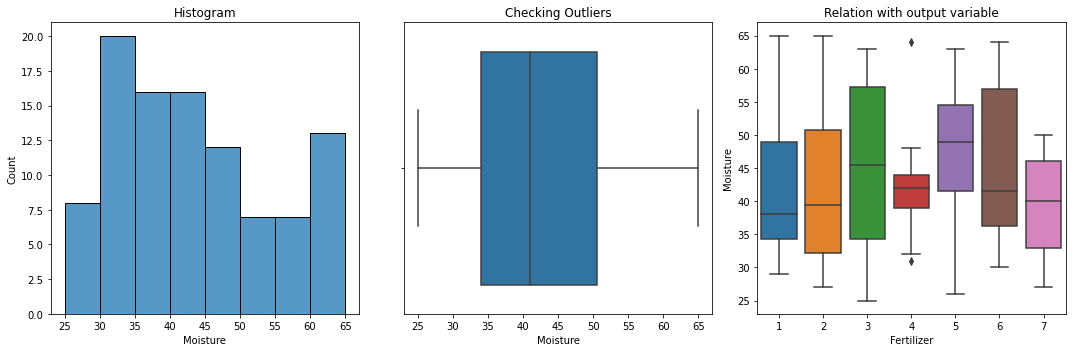

In [24]:
#EDA - Moisture variable
plot_conti(data.Moisture)

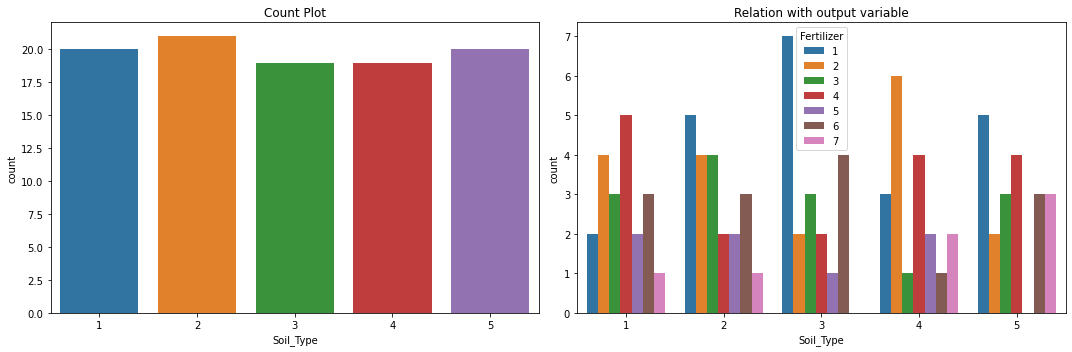

In [25]:
#EDA - Soil_Type variable
plot_cato(data.Soil_Type)

<AxesSubplot:xlabel='Soil_Type', ylabel='Temparature'>

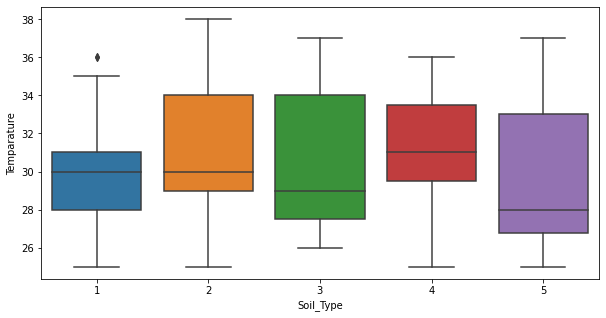

In [26]:
#relation of soil type with Temperature 
plt.figure(figsize=(10,5))
sns.boxplot(x=data.Soil_Type,y=data.Temparature)

<AxesSubplot:xlabel='Soil_Type', ylabel='Temparature'>

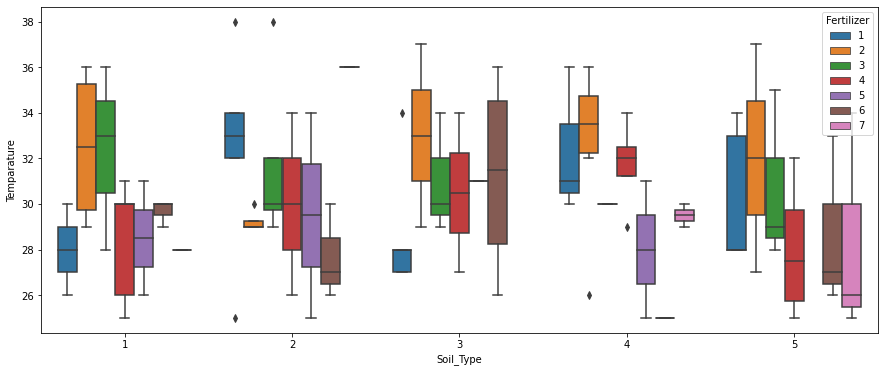

In [27]:
#relation of soil type and Temperature with output variable
plt.figure(figsize=(15,6))
sns.boxplot(x=data.Soil_Type,y=data.Temparature,hue=data.Fertilizer)

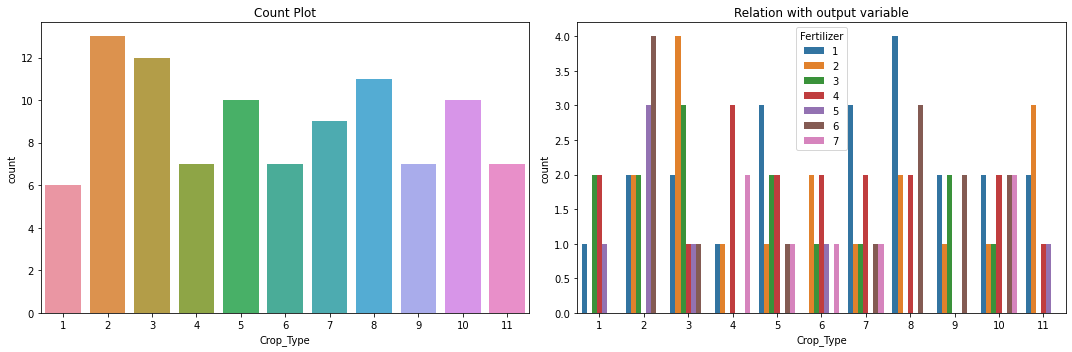

In [28]:
#EDA - Crop_Type variable
plot_cato(data.Crop_Type)

<AxesSubplot:xlabel='Crop_Type', ylabel='Temparature'>

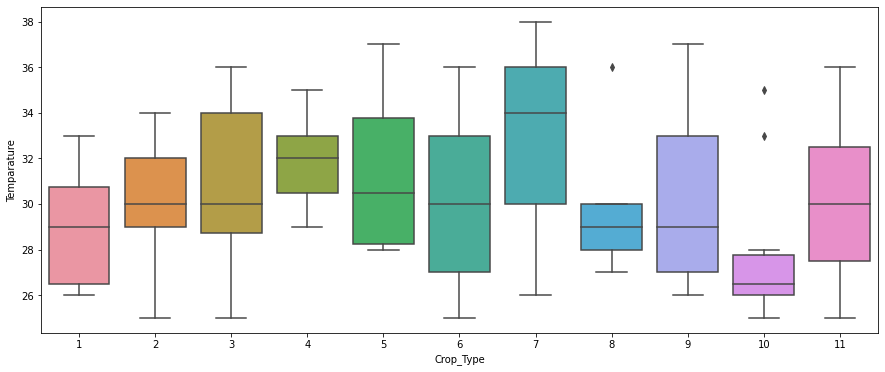

In [29]:
#relation of crop type with temperature
plt.figure(figsize=(15,6))
sns.boxplot(x=data.Crop_Type,y=data.Temparature)

<AxesSubplot:xlabel='Crop_Type', ylabel='Humidity'>

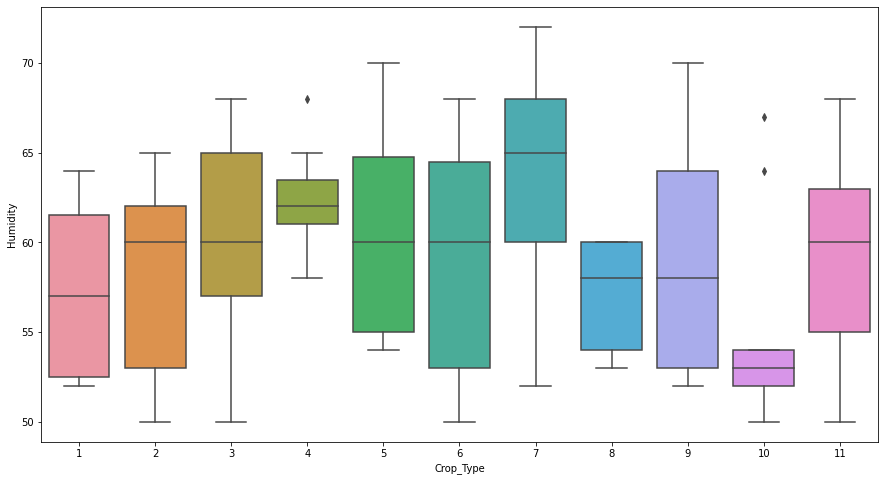

In [30]:
#relation of crop type with Humidity
plt.figure(figsize=(15,8))
sns.boxplot(x=data.Crop_Type,y=data.Humidity)

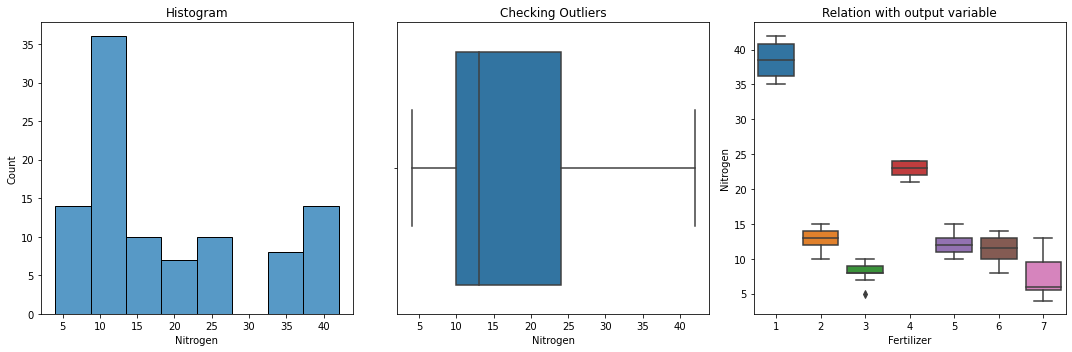

In [31]:
#EDA - Nitrogen variable
plot_conti(data.Nitrogen)

<AxesSubplot:xlabel='Crop_Type', ylabel='Nitrogen'>

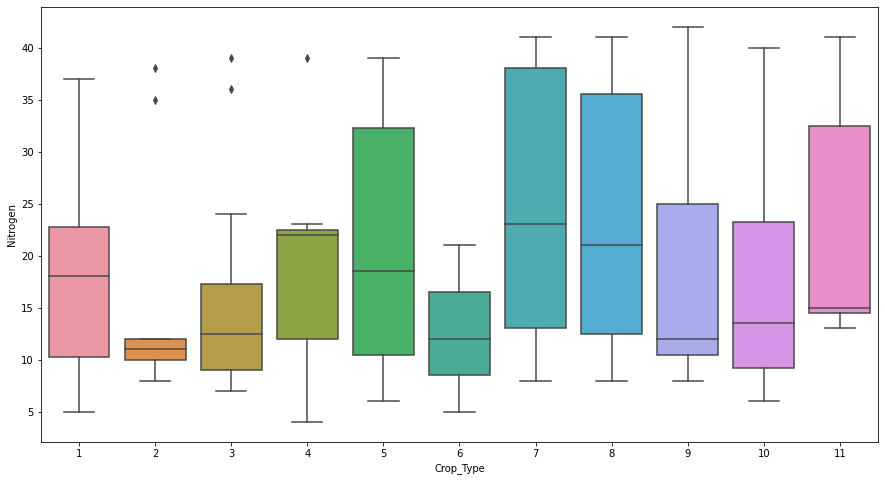

In [32]:
#relation of nitrogen wrt to crop type
plt.figure(figsize=(15,8))
sns.boxplot(x=data.Crop_Type,y=data.Nitrogen)

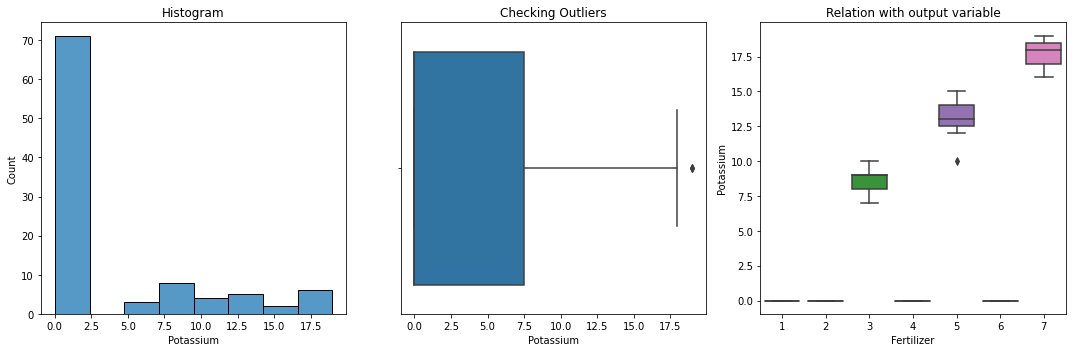

In [33]:
#EDA - Potassium variable
plot_conti(data.Potassium)

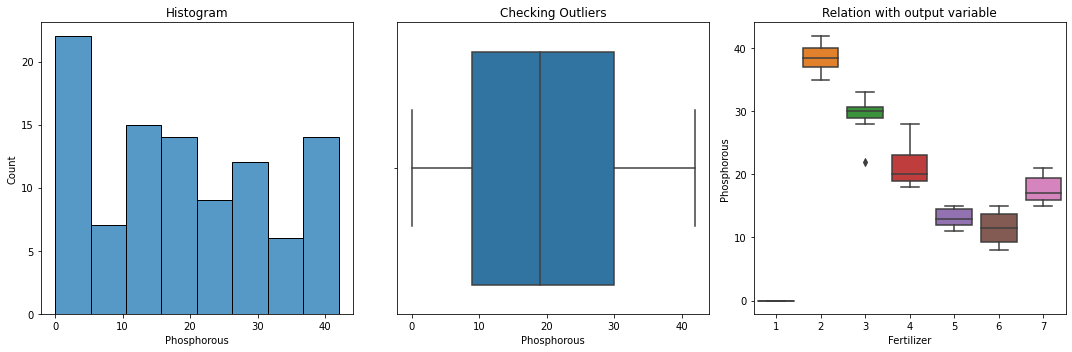

In [34]:
#EDA - Phosphorous variable
plot_conti(data.Phosphorous)

In [35]:
data.head()

,Temparature,Humidity,Moisture,Soil_Type,Crop_Type,Nitrogen,Potassium,Phosphorous,Fertilizer
0,26,52,38,1,1,37,0,0,1
1,29,52,45,2,2,12,0,36,2
2,34,65,62,3,3,7,9,30,3
3,32,62,34,4,4,22,0,20,4
4,28,54,46,5,5,35,0,0,1


<AxesSubplot:>

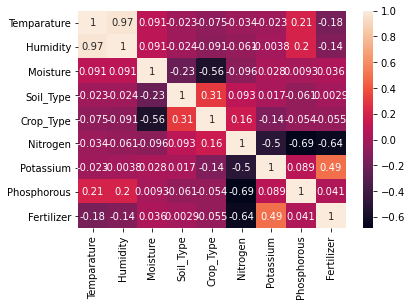

In [36]:
sns.heatmap(data.corr(),annot=True)

In [37]:
data.isnull().sum()

Temparature    0
Humidity       0
Moisture       0
Soil_Type      0
Crop_Type      0
Nitrogen       0
Potassium      0
Phosphorous    0
Fertilizer     0
dtype: int64

<AxesSubplot:xlabel='Fertilizer', ylabel='count'>

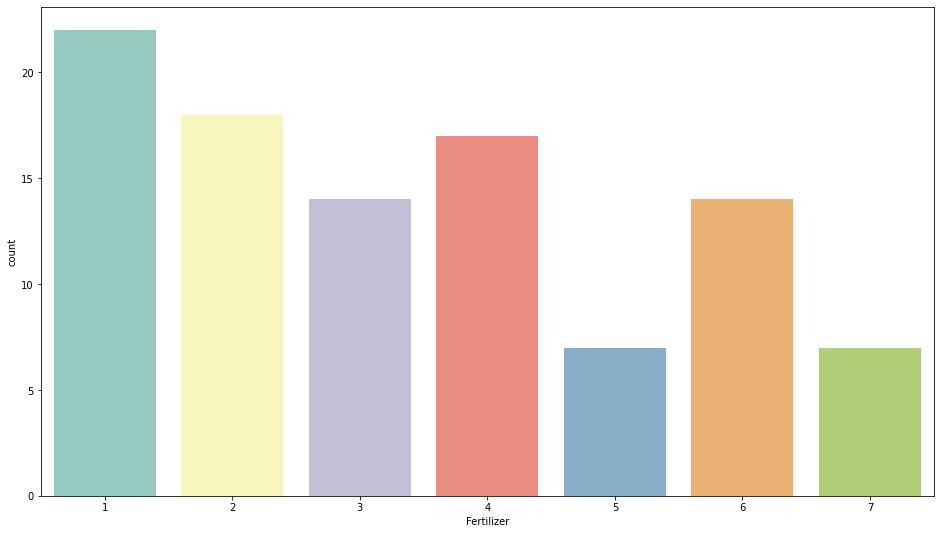

In [38]:
sns.set_palette('Set3')
plt.figure(figsize=(16,9))
sns.countplot(data=data,x = 'Fertilizer')

In [39]:
data['Soil_Type'].unique()

array([1, 2, 3, 4, 5])

In [40]:
import scipy.stats as stats

In [41]:
def visualise(df,col):
    plt.figure(figsize=(15,7))
    plt.subplot(1,3,1)
    plt.hist(df[col],color = 'pink')
    
    plt.subplot(1,3,2)
    stats.probplot(df[col],dist='norm',plot=plt)
    
    plt.subplot(1,3,3)
    sns.boxplot(df[col],color = 'pink')
    
    plt.show()

 Statistical plots for : Temparature is shown ↓


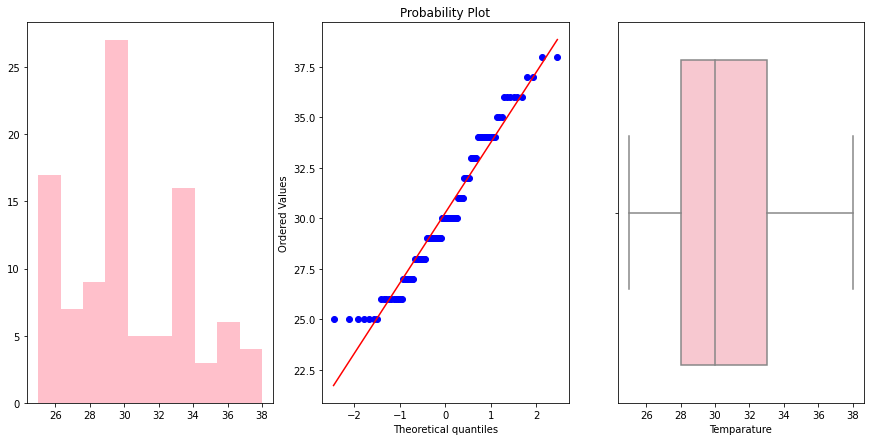

------------------------------------------------------------
 Statistical plots for : Humidity is shown ↓


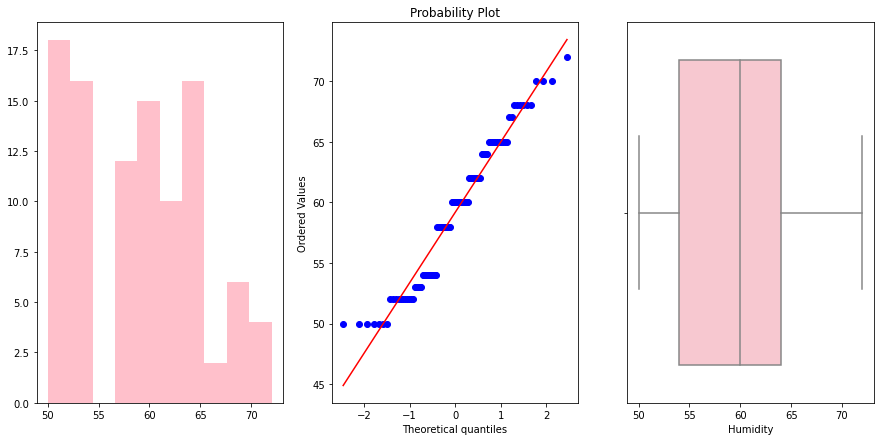

------------------------------------------------------------
 Statistical plots for : Moisture is shown ↓


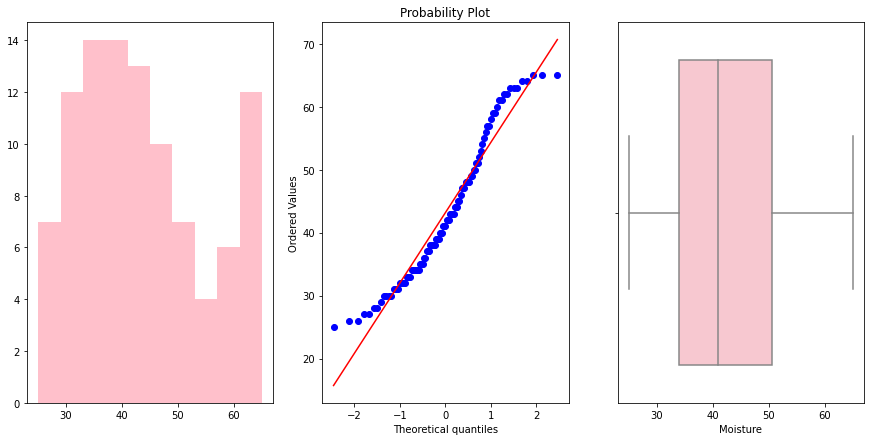

------------------------------------------------------------
 Statistical plots for : Soil_Type is shown ↓


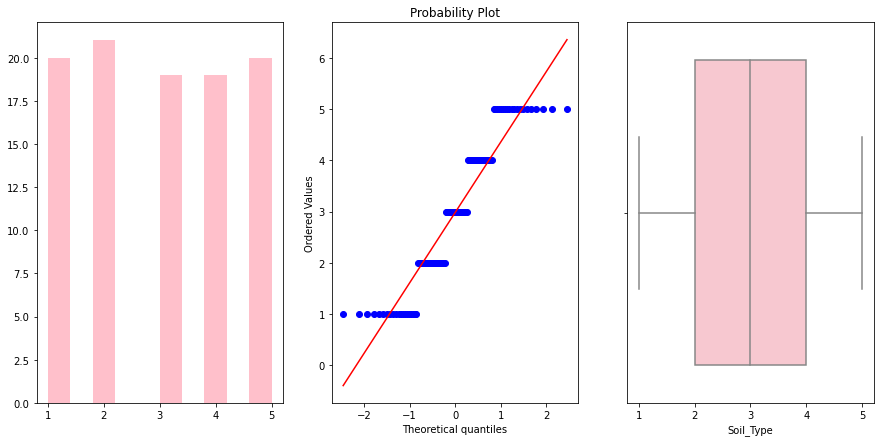

------------------------------------------------------------
 Statistical plots for : Crop_Type is shown ↓


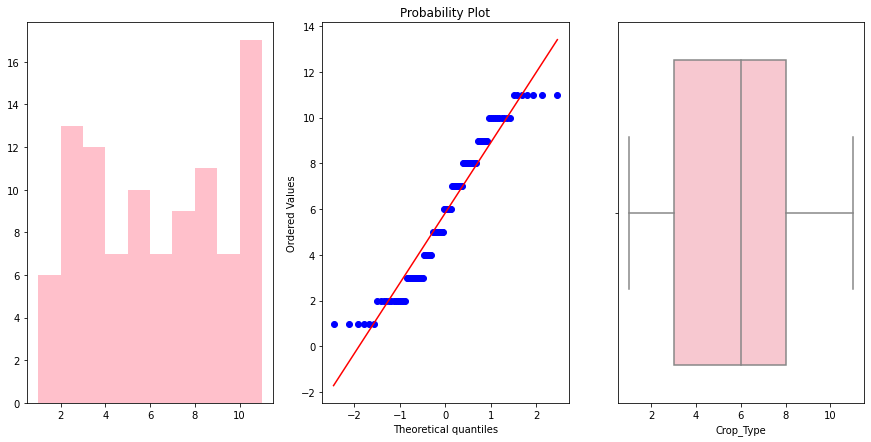

------------------------------------------------------------
 Statistical plots for : Nitrogen is shown ↓


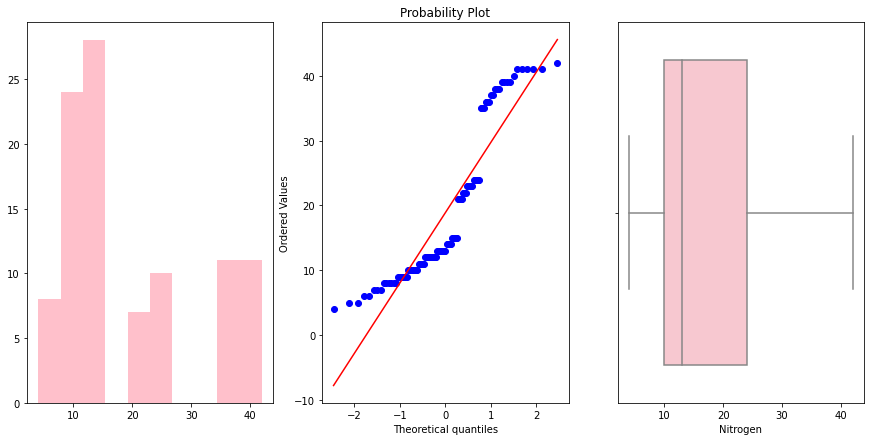

------------------------------------------------------------
 Statistical plots for : Potassium is shown ↓


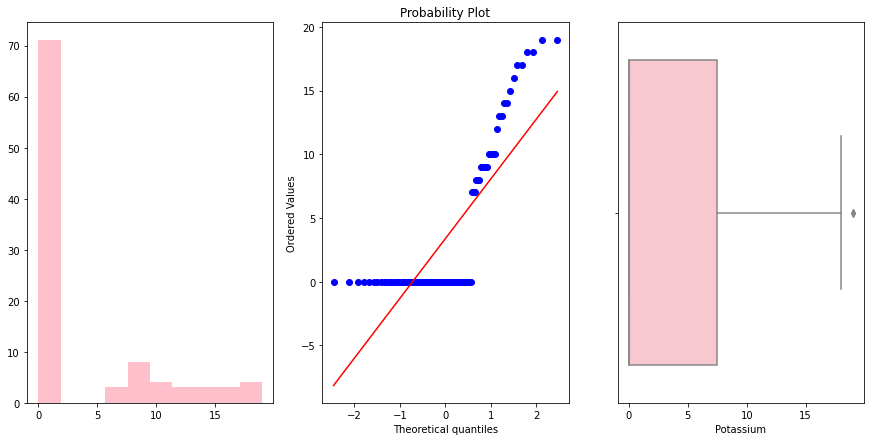

------------------------------------------------------------
 Statistical plots for : Phosphorous is shown ↓


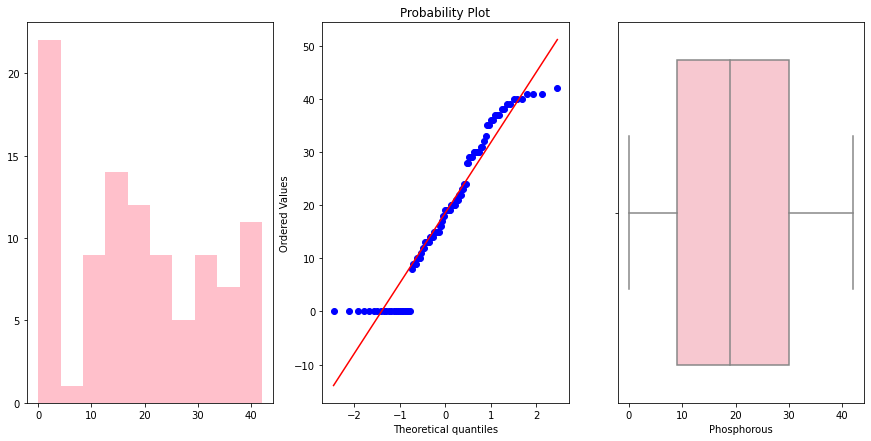

------------------------------------------------------------


In [42]:
for i in data.columns[:-1]:
    print(f' Statistical plots for : {i} is shown ↓')
    visualise(data,i)
    print("-"*60)

In [43]:
def quantile(df,val):
    a = []
    df_25 = df[val].quantile(0.25)
    df_75 = df[val].quantile(0.75)
    iqr = df_75-df_25
    upper_limit = float(df_75+(iqr*1.5))
    lower_limit = float(df_25-(iqr*1.5))
    for i in df[val]:
        if i>upper_limit:
            i = np.NaN
        elif i<lower_limit:
            i = np.NaN
        else:
            i = i
        a.append(i)
    return a

## Outlier Removal

### First Lets detect the outliers as shown ↓

**We will be using the gaussian trainsformation technique which says if there are datapoints greater than "mean+{num} * std",then there is a possibilty that that particular datapoint will not fit in the gaussian distribution,so here i have choosen the num as 3,so my range is {lower,upper} = {mean-{3} * std,mean+{3} * std},if there are any datapoints beyond these ranges,then they must be removed,so we find there are couple of data points of that,inorder to remove these outilers,we will be using another method of `Quantiles` which is `Inter Quantile Range` which is a better approach!**

In [44]:
temp = data.copy()

In [45]:
upper_list = []
lower_list = []

In [46]:
for i in temp.columns[:-1]:
    upper_list.append(data[i].mean()+(data[i].std())*3)
    lower_list.append(data[i].mean()-(data[i].std())*3)

In [47]:
j = 0

In [48]:
for i in temp.columns[:-1]:
    dummy = temp[(temp[i]>upper_list[j])|(temp[i]<lower_list[j])];j+=1

In [49]:
dummy

,Temparature,Humidity,Moisture,Soil_Type,Crop_Type,Nitrogen,Potassium,Phosphorous,Fertilizer


This shows that there are no outliers in the whole dataset.

# One-Hot Encoder

In [50]:
y = data['Fertilizer'].copy()
X = data.drop('Fertilizer', axis=1).copy()

In [51]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [3,4])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [52]:
X[0]

array([ 1.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0., 26., 52., 38., 37.,  0.,  0.])

# Train-test split

In [53]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, shuffle=True, random_state=42)

# Feature Scaling

In [54]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [55]:
X_train[0]

array([ 2.06559112, -0.54321448, -0.48412292, -0.48412292, -0.50395263,
        4.33012702, -0.42320737, -0.33567254, -0.23094011, -0.33567254,
       -0.25993762, -0.33567254, -0.38069349, -0.25993762, -0.33567254,
       -0.31180478,  0.76462082,  0.80219471,  0.71373089, -1.15292671,
        0.91259936,  0.80677787])

### ML ALGO 

In [56]:
from sklearn.model_selection import RandomizedSearchCV,cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn import metrics
from sklearn.svm import SVC 

In [57]:
# Initialzing empty lists to append all model's name and corresponding name
acc = []
model = []

# Decision Tree

In [58]:
DecisionTree = DecisionTreeClassifier(criterion="entropy",random_state=2,max_depth=5)

In [59]:
print(X_train.shape,y_train.shape)
DecisionTree.fit(X_train,y_train)

(79, 22) (79,)


DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=2)

In [60]:
predicted_values = DecisionTree.predict(X_test)

In [61]:
x = metrics.accuracy_score(y_test, predicted_values)

In [62]:
acc.append(x)

In [63]:
model.append('DT')

In [64]:
print("DecisionTrees's Accuracy is: ", x*100)

DecisionTrees's Accuracy is:  100.0


In [65]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predicted_values))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         6
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         5
           6       1.00      1.00      1.00         1
           7       1.00      1.00      1.00         2

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



In [66]:
# Cross validation score (Decision Tree)
score = cross_val_score(DecisionTree, data, data.iloc[:,-1],cv=5)

In [67]:
np.mean(score)

0.9800000000000001

## Extra Tree Classifier

In [68]:
from sklearn.tree import ExtraTreeClassifier
ExtraTreeClassifier = ExtraTreeClassifier(criterion="entropy",random_state=2,max_depth=5)

In [69]:
ExtraTreeClassifier.fit(X_train,y_train)

ExtraTreeClassifier(criterion='entropy', max_depth=5, random_state=2)

In [70]:
predicted_values = ExtraTreeClassifier.predict(X_test)

In [71]:
x = metrics.accuracy_score(y_test, predicted_values)

In [72]:
acc.append(x)
model.append('ETC')

In [73]:
print("ExtraTreeClassifier's Accuracy is: ", x*100)

ExtraTreeClassifier's Accuracy is:  35.0


In [74]:

print(classification_report(y_test,predicted_values))

              precision    recall  f1-score   support

           1       0.36      0.67      0.47         6
           2       0.29      0.40      0.33         5
           3       0.50      1.00      0.67         1
           4       0.00      0.00      0.00         5
           6       0.00      0.00      0.00         1
           7       0.00      0.00      0.00         2

    accuracy                           0.35        20
   macro avg       0.19      0.34      0.25        20
weighted avg       0.21      0.35      0.26        20



In [75]:
# Cross validation score (Decision Tree)
score = cross_val_score(ExtraTreeClassifier, data,  data.iloc[:,-1],cv=5)

In [76]:
score.mean()*100

99.0

# Guassian Naive Bayes

In [77]:
from sklearn.naive_bayes import GaussianNB

In [78]:
NaiveBayes = GaussianNB()

In [79]:
NaiveBayes.fit(X_train,y_train)

GaussianNB()

In [80]:
predicted_values = NaiveBayes.predict(X_test)

In [81]:
x = metrics.accuracy_score(y_test, predicted_values)

In [82]:
acc.append(x)

In [83]:
model.append('NB')

In [84]:
print("Naive Bayes's Accuracy is: ", x)

Naive Bayes's Accuracy is:  0.5


In [85]:
print(classification_report(y_test,predicted_values))

              precision    recall  f1-score   support

           1       1.00      0.17      0.29         6
           2       1.00      0.60      0.75         5
           3       0.00      0.00      0.00         1
           4       0.67      0.80      0.73         5
           5       0.00      0.00      0.00         0
           6       0.17      1.00      0.29         1
           7       1.00      0.50      0.67         2

    accuracy                           0.50        20
   macro avg       0.55      0.44      0.39        20
weighted avg       0.82      0.50      0.54        20



In [86]:
# Cross validation score (NaiveBayes)
score = cross_val_score(NaiveBayes,data,data.iloc[:,-1],cv=5)

In [87]:
score.mean()

1.0

# Support Vector Machine (SVM)

In [88]:
from sklearn.svm import SVC

In [89]:
SVM = SVC(kernel='poly', degree=3, C=1)
SVM.fit(X_train,y_train)

SVC(C=1, kernel='poly')

In [90]:
predicted_values = SVM.predict(X_test)

In [91]:
x = metrics.accuracy_score(y_test, predicted_values)

In [92]:
acc.append(x)
model.append('SVM')

In [93]:
print("SVM's Accuracy is: ", x)

SVM's Accuracy is:  0.2


In [94]:
print(classification_report(y_test,predicted_values))

              precision    recall  f1-score   support

           1       0.50      0.17      0.25         6
           2       0.00      0.00      0.00         5
           3       0.00      0.00      0.00         1
           4       0.33      0.40      0.36         5
           6       0.00      0.00      0.00         1
           7       1.00      0.50      0.67         2

    accuracy                           0.20        20
   macro avg       0.31      0.18      0.21        20
weighted avg       0.33      0.20      0.23        20



In [95]:
# Cross validation score (SVM)
score = cross_val_score(SVM,data,data.iloc[:,-1],cv=5)


In [96]:
score.mean()*100

98.00000000000001

# Logistic Regression

In [97]:
from sklearn.linear_model import LogisticRegression

In [98]:
LogReg = LogisticRegression(random_state=2)

In [99]:
LogReg.fit(X_train,y_train)

LogisticRegression(random_state=2)

In [100]:
predicted_values = LogReg.predict(X_test)

In [101]:
x = metrics.accuracy_score(y_test, predicted_values)

In [102]:
acc.append(x)
model.append('Logistic Regression')

In [103]:
print("Logistic Regression's Accuracy is: ", x)


Logistic Regression's Accuracy is:  0.9


In [104]:

print(classification_report(y_test,predicted_values))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         6
           2       0.83      1.00      0.91         5
           3       0.50      1.00      0.67         1
           4       1.00      0.80      0.89         5
           6       1.00      1.00      1.00         1
           7       1.00      0.50      0.67         2

    accuracy                           0.90        20
   macro avg       0.89      0.88      0.86        20
weighted avg       0.93      0.90      0.90        20



In [105]:
# Cross validation score (Logistic Regression)
score = cross_val_score(LogReg,data,data.iloc[:,-1],cv=5)

In [106]:
score.mean()*100

98.00000000000001

# XGBoost

In [107]:
import xgboost as xgb

In [108]:
XB = xgb.XGBClassifier()

In [109]:
XB.fit(X_train,y_train)

[00:37:53] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [110]:

predicted_values = XB.predict(X_test)

In [111]:

x = metrics.accuracy_score(y_test, predicted_values)

In [112]:

acc.append(x)
model.append('XGBoost')

In [113]:

print("XGBoost's Accuracy is: ", x)

XGBoost's Accuracy is:  1.0


In [114]:
print(classification_report(y_test,predicted_values))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         6
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         5
           6       1.00      1.00      1.00         1
           7       1.00      1.00      1.00         2

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



In [115]:
# Cross validation score (XGBoost)
score = cross_val_score(XB,data,data.iloc[:,-1],cv=5)


[00:37:54] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:37:54] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:37:55] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:37:55] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the ol

In [116]:
score.mean()*100

97.0

## GradientBootsting Classifier

In [117]:
GBC = GradientBoostingClassifier(n_estimators=20, random_state=0)

In [118]:
GBC.fit(X_train,y_train)

GradientBoostingClassifier(n_estimators=20, random_state=0)

In [119]:

predicted_values = GBC.predict(X_test)

In [120]:
x = metrics.accuracy_score(y_test, predicted_values)

In [121]:
acc.append(x)
model.append('GBC')

In [122]:
print("GBC's Accuracy is: ", x)

GBC's Accuracy is:  0.95


In [123]:
print(classification_report(y_test,predicted_values))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         6
           2       1.00      0.80      0.89         5
           3       0.50      1.00      0.67         1
           4       1.00      1.00      1.00         5
           6       1.00      1.00      1.00         1
           7       1.00      1.00      1.00         2

    accuracy                           0.95        20
   macro avg       0.92      0.97      0.93        20
weighted avg       0.97      0.95      0.96        20



In [124]:
# Cross validation score (GradientBoostingClassifier)
score = cross_val_score(GBC,data,data.iloc[:,-1],cv=5)


In [125]:
score.mean()*100

99.0

## K Nearest Neighbors

In [181]:
KNN = KNeighborsClassifier()

In [182]:
KNN.fit(X_train,y_train)

KNeighborsClassifier()

In [183]:
predicted_values = KNN.predict(X_test)

In [184]:
x = metrics.accuracy_score(y_test, predicted_values)

In [185]:
acc.append(x)
model.append('KNN')

In [186]:
print("KNN's Accuracy is: ", x)

KNN's Accuracy is:  0.2


In [187]:

print(classification_report(y_test,predicted_values))

              precision    recall  f1-score   support

           1       0.33      0.33      0.33         6
           2       0.14      0.50      0.22         2
           3       0.33      0.33      0.33         3
           4       0.00      0.00      0.00         2
           5       0.00      0.00      0.00         2
           6       0.00      0.00      0.00         2
           7       0.00      0.00      0.00         3

    accuracy                           0.20        20
   macro avg       0.12      0.17      0.13        20
weighted avg       0.16      0.20      0.17        20



In [133]:
# Cross validation score (KNN)
score = cross_val_score(KNN,data,data.iloc[:,-1],cv=5)


In [134]:
score.mean()*100

82.73684210526315

## Stochastic Gradient Descent Classifier

In [135]:
from sklearn.linear_model import SGDClassifier

In [136]:
SGD=SGDClassifier(loss='modified_huber',shuffle=True,random_state=101)

In [137]:
SGD.fit(X_train,y_train)

SGDClassifier(loss='modified_huber', random_state=101)

In [138]:
predicted_values = SGD.predict(X_test)

In [139]:
x = metrics.accuracy_score(y_test, predicted_values)

In [140]:
acc.append(x)
model.append('SGD')

In [141]:

print("SGD's Accuracy is: ", x)


SGD's Accuracy is:  0.8


In [142]:

print(classification_report(y_test,predicted_values))

              precision    recall  f1-score   support

           1       0.86      1.00      0.92         6
           2       0.83      1.00      0.91         5
           3       0.00      0.00      0.00         1
           4       1.00      0.60      0.75         5
           5       0.00      0.00      0.00         0
           6       1.00      1.00      1.00         1
           7       1.00      0.50      0.67         2

    accuracy                           0.80        20
   macro avg       0.67      0.59      0.61        20
weighted avg       0.87      0.80      0.81        20



In [143]:
data[:-1]

,Temparature,Humidity,Moisture,Soil_Type,Crop_Type,Nitrogen,Potassium,Phosphorous,Fertilizer
0,26,52,38,1,1,37,0,0,1
1,29,52,45,2,2,12,0,36,2
2,34,65,62,3,3,7,9,30,3
3,32,62,34,4,4,22,0,20,4
4,28,54,46,5,5,35,0,0,1
...,...,...,...,...,...,...,...,...,...
93,28,54,25,1,1,9,10,30,3
94,25,50,32,5,10,24,0,19,4
95,30,60,27,4,4,4,17,17,7
96,38,72,51,2,7,39,0,0,1


In [144]:
# Cross validation score (Logistic Regression)
score = cross_val_score(SGD,data,data.iloc[:,-1],cv=5)
score.mean()**100

1.295831535691417e-14

In [145]:
accuracy_models = dict(zip(model, acc))

<AxesSubplot:title={'center':'Accuracy Comparison'}, xlabel='Accuracy', ylabel='Algorithm'>

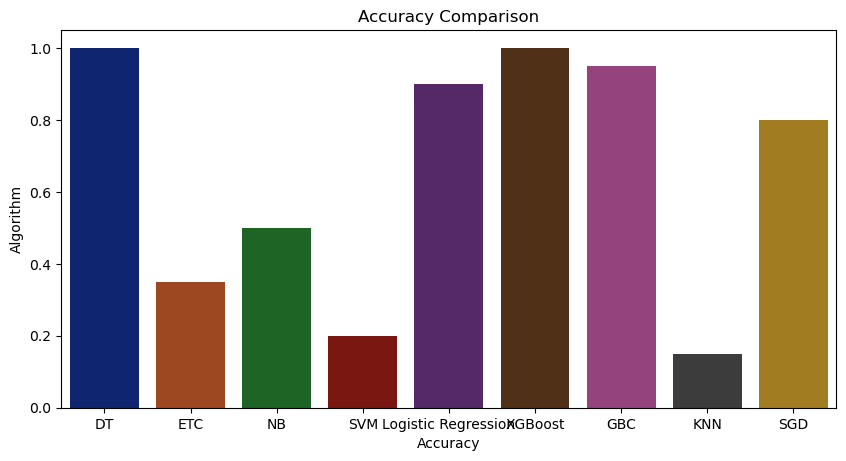

In [146]:
plt.figure(figsize=[10,5],dpi = 100)
plt.title('Accuracy Comparison')
plt.xlabel('Accuracy')
plt.ylabel('Algorithm')
sns.barplot(x =model,y = acc,palette='dark',orient='v')

In [147]:
for k, v in accuracy_models.items():
    print (k, '-->', v)

DT --> 1.0
ETC --> 0.35
NB --> 0.5
SVM --> 0.2
Logistic Regression --> 0.9
XGBoost --> 1.0
GBC --> 0.95
KNN --> 0.15
SGD --> 0.8


# Random Forest Classifier

In [148]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators= 100, criterion = 'gini' , random_state= 42)
classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [149]:
y_pred = classifier.predict(X_test)

# Creating confusion matrix

In [150]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[6 0 0 0 0 0 0]
 [0 5 0 0 0 0 0]
 [0 0 1 0 0 0 0]
 [0 0 0 5 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0]
 [0 0 0 0 1 0 1]]


0.95

In [151]:
classifier.score(X_test, y_test)

0.95

**Test accuracy = 96.67%**

In [152]:
# Preprocessing using Label Encoder

In [153]:
#encoding the labels for categorical variables
from sklearn.preprocessing import LabelEncoder


In [154]:
#splitting the data into train and test
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(data.drop('Fertilizer',axis=1),data['Fertilizer'],test_size=0.2,random_state=1)
print('Shape of Splitting :')
print('x_train = {}, y_train = {}, x_test = {}, y_test = {}'.format(x_train.shape,y_train.shape,x_test.shape,y_test.shape))

Shape of Splitting :
x_train = (79, 8), y_train = (79,), x_test = (20, 8), y_test = (20,)


In [155]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 79 entries, 2 to 37
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Temparature  79 non-null     int64
 1   Humidity     79 non-null     int64
 2   Moisture     79 non-null     int64
 3   Soil_Type    79 non-null     int64
 4   Crop_Type    79 non-null     int64
 5   Nitrogen     79 non-null     int64
 6   Potassium    79 non-null     int64
 7   Phosphorous  79 non-null     int64
dtypes: int64(8)
memory usage: 5.6 KB


# Hyperparameter tuning with GridSearchCV

The performance of a model significantly depends on the value of hyperparameters. Grid Search is the process of performing hyperparameter tuning in order to determine the optimal values for a given model. 

In [156]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report

params = {
    'n_estimators':[300,400,500],
    'max_depth':[5,10,15],
    'min_samples_split':[2,5,8]
}
grid_rand = GridSearchCV(rand,params,cv=3,verbose=3,n_jobs=-1)

grid_rand.fit(x_train,y_train)

pred_rand = grid_rand.predict(x_test)

print(classification_report(y_test,pred_rand))

print('Best score : ',grid_rand.best_score_)
print('Best params : ',grid_rand.best_params_)

NameError: name 'rand' is not defined

**Best score = 97.48%**

In [ ]:
y_train[2]

In [ ]:
#pickling the file
import pickle
pickle_out = open('classifier.pkl','wb')
pickle.dump(grid_rand,pickle_out)
pickle_out.close()

In [ ]:
data.head()

In [ ]:
model = pickle.load(open('classifier.pkl','rb'))
ans = model.predict([[34,65,62	,0,	1,	7,	9,	30]])
if ans[0] == 0:
    print("10-26-26")
elif ans[0] ==1:
    print("14-35-14")
elif ans[0] == 2:
    print("17-17-17	")
elif ans[0] == 3:
    print("20-20")
elif ans[0] == 4:
    print("28-28")
elif ans[0] == 5:
    print("DAP")
else:
    print("Urea")

In [ ]:
#encoding the labels for categorical variables
from sklearn.preprocessing import LabelEncoder

In [ ]:
#encoding Soil Type variable
encode_soil = LabelEncoder()

#fitting the label encoder
data.Soil_Type = encode_soil.fit_transform(data.Soil_Type)

#creating the DataFrame
Soil_Type = pd.DataFrame(zip(encode_soil.classes_,encode_soil.transform(encode_soil.classes_)),columns=['Original','Encoded'])
Soil_Type = Soil_Type.set_index('Original')
Soil_Type

In [ ]:
#encoding Crop Type variable
encode_crop = LabelEncoder()

#fitting the label encoder
data.Crop_Type = encode_crop.fit_transform(data.Crop_Type)

#creating the DataFrame
Crop_Type = pd.DataFrame(zip(encode_crop.classes_,encode_crop.transform(encode_crop.classes_)),columns=['Original','Encoded'])
Crop_Type = Crop_Type.set_index('Original')
Crop_Type

In [ ]:
#encoding Fertilizer variable
encode_ferti = LabelEncoder()

#fitting the label encoder
data.Fertilizer = encode_ferti.fit_transform(data.Fertilizer)

#creating the DataFrame
Fertilizer = pd.DataFrame(zip(encode_ferti.classes_,encode_ferti.transform(encode_ferti.classes_)),columns=['Original','Encoded'])
Fertilizer = Fertilizer.set_index('Original')
Fertilizer

In [ ]:
#splitting the data into train and test
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(data.drop('Fertilizer',axis=1),data.Fertilizer,test_size=0.2,random_state=1)
print('Shape of Splitting :')
print('x_train = {}, y_train = {}, x_test = {}, y_test = {}'.format(x_train.shape,y_train.shape,x_test.shape,y_test.shape))

In [ ]:
x_train.info()

## Hyper Parameter tuning

In [ ]:
params = {
    'RandomForest':{
        'model': RandomForestClassifier(),
        'params':{
            'n_estimators': [int(x) for x in np.linspace(start=1,stop=1200,num=10)],
            'max_depth':[int(x) for x in np.linspace(start=1,stop=30,num=5)],
            'min_samples_split':[2,5,10,12],
            'min_samples_leaf':[2,5,10,12],
            'max_features':['auto','sqrt'],
            'ccp_alpha':[0.030,0.035,0.040,0.045,0.050],
        }
    },
    
    'logistic':{
        'model':LogisticRegression(),
        'params':{
            'penalty':['l1', 'l2', 'elasticnet'],
            'C':[0.25,0.50,0.75,1.0],
            'tol':[1e-10,1e-5,1e-4,1e-3,0.025,0.25,0.50],
            'solver':['lbfgs','liblinear','saga','newton-cg'],
            'multi_class':['auto', 'ovr', 'multinomial'],
            'max_iter':[int(x) for x in np.linspace(start=1,stop=250,num=10)],
        }
    },
    'D-tree':{
        'model':DecisionTreeClassifier(),
        'params':{
            'criterion':['gini','entropy'],
            'splitter':['best','random'],
            'min_samples_split':[1,2,5,10,12],
            'min_samples_leaf':[1,2,5,10,12],
            'max_features':['auto','sqrt'],
            'ccp_alpha':[0.030,0.035,0.040,0.045,0.050],
        }
    },
    'SVM':{
        'model':SVC(),
        'params':{
            'C':[0.25,0.50,0.75,1.0],
            'tol':[1e-10,1e-5,1e-4,0.025,0.50,0.75],
            'kernel':['linear','poly','sigmoid','rbf'],
            'max_iter':[int(x) for x in np.linspace(start=1,stop=250,num=10)],
        }
    }
}

In [ ]:

scores = []
for model_name,mp in params.items():
    clf = RandomizedSearchCV(mp['model'],param_distributions= mp['params'],cv = 5,n_jobs=-1,n_iter = 10,scoring='accuracy',
                            verbose=2)
    clf.fit(X_train,y_train)
    scores.append({
        'model_name':model_name,
        'best_score':clf.best_score_,
        'best_estimator':clf.best_estimator_
    })


In [ ]:
scores_df = pd.DataFrame(data = scores,columns = ['model_name','best_estimator','best_score'])
scores_df

In [ ]:
for i in scores_df['best_estimator']:
    print(i)

In [ ]:
svc = SVC(C=0.5, kernel='poly', max_iter=139, tol=1e-10)
svc.fit(X_train,y_train)
svc.score(X_test,y_test)

In [ ]:
rf = RandomForestClassifier(ccp_alpha=0.03, max_depth=22, min_samples_leaf=12,
                       min_samples_split=5, n_estimators=800)

rf.fit(X_train,y_train)
rf.score(X_test,y_test)

In [ ]:
lr = LogisticRegression(C=0.75, max_iter=194, multi_class='ovr', penalty='l1',
                   solver='liblinear')
lr.fit(X_train,y_train)
lr.score(X_test,y_test)